<a href="https://colab.research.google.com/github/leminhquoc248/AI_code/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

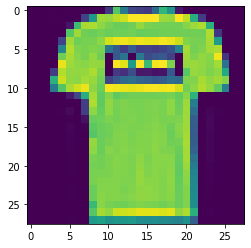

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

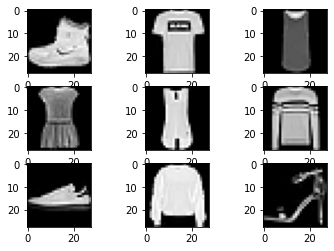

In [ ]:
for i in range (9):
  plt.subplot(330+i+1) 
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
from keras.utils import np_utils
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
from keras.layers import Dense,Activation,Dropout
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale,StandardScaler
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                  validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=30)])

Epoch 1/500
375/375 [==============================] - 8s 18ms/step - loss: 0.5770 - accuracy: 0.7899 - val_loss: 0.4508 - val_accuracy: 0.8273
Epoch 2/500
375/375 [==============================] - 7s 18ms/step - loss: 0.4027 - accuracy: 0.8522 - val_loss: 0.3862 - val_accuracy: 0.8637
Epoch 3/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3598 - accuracy: 0.8679 - val_loss: 0.3623 - val_accuracy: 0.8662
Epoch 4/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3351 - accuracy: 0.8772 - val_loss: 0.3433 - val_accuracy: 0.8776
Epoch 5/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3189 - accuracy: 0.8814 - val_loss: 0.4526 - val_accuracy: 0.8472
Epoch 6/500
375/375 [==============================] - 7s 18ms/step - loss: 0.3035 - accuracy: 0.8887 - val_loss: 0.3639 - val_accuracy: 0.8764
Epoch 7/500
375/375 [==============================] - 7s 18ms/step - loss: 0.2946 - accuracy: 0.8913 - val_loss: 0.3522 - val_accuracy:

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test_loss',score[0])
print('Test accuracy',score[1])

Test_loss 0.6427792906761169
Test accuracy 0.8913000226020813


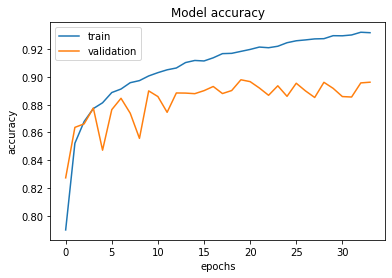

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()